# importation des bibliothèques

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# importation de la bibliothèques

In [19]:
bd = pd.read_csv("camera_dataset.csv")
bd

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


# Origine : ce dataset prend son origine de l'analyse des types de caméras en fonction des caractéristiques et options de celles ci  
# circonstances de création : descente dans une industrie de fabrication de caméra pour en rescencer les differentes caractéristiques
# prévision : nous pouvons faire des études statistiques pour trouver la caméra la plus performante en terme de résolution, de zoom, et également la plus accessible en terme de prix
# bref apercu : les données sont representés sous formes matricielle de dimmension 1038*13. A première vue, on ne discerne pas de valeurs manquantes dans le dataset

# Affichons les 10 premières lignes du dataset

In [20]:
bd.head(10)

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
5,Agfa ePhoto CL45,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0
6,Agfa ePhoto CL50,1999,1280.0,640.0,1.0,34.0,102.0,0.0,0.0,8.0,0.0,0.0,179.0
7,Canon PowerShot 350,1997,640.0,0.0,0.0,42.0,42.0,70.0,3.0,2.0,320.0,93.0,149.0
8,Canon PowerShot 600,1996,832.0,640.0,0.0,50.0,50.0,40.0,10.0,1.0,460.0,160.0,139.0
9,Canon PowerShot A10,2001,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0


# Affichons les 10 dernières lignes du dataset 

In [21]:
bd.tail(10)

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
1028,Toshiba PDR-M3,1999,1280.0,640.0,1.0,38.0,115.0,90.0,25.0,4.0,380.0,122.0,62.0
1029,Toshiba PDR-M4,1999,1600.0,800.0,1.0,40.0,40.0,50.0,10.0,8.0,290.0,112.0,62.0
1030,Toshiba PDR-M5,1999,1600.0,800.0,1.0,40.0,120.0,90.0,25.0,8.0,350.0,130.0,62.0
1031,Toshiba PDR-M60,2000,1792.0,896.0,2.0,38.0,86.0,50.0,5.0,4.0,320.0,121.0,449.0
1032,Toshiba PDR-M61,2001,1792.0,896.0,2.0,38.0,114.0,50.0,5.0,8.0,310.0,123.0,62.0
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0
1037,Toshiba PDR-T10,2002,1600.0,800.0,1.0,38.0,38.0,40.0,20.0,8.0,180.0,86.0,129.0


# Affichons le types de données de chaque colonnes

In [22]:
bd.dtypes

Model                       object
Release date                 int64
Max resolution             float64
Low resolution             float64
Effective pixels           float64
Zoom wide (W)              float64
Zoom tele (T)              float64
Normal focus range         float64
Macro focus range          float64
Storage included           float64
Weight (inc. batteries)    float64
Dimensions                 float64
Price                      float64
dtype: object

In [23]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


# Ainsi on remarque que appart la première colonne qui concerne les modèles de caméras et dont les données sont des objets, les types de données des autres colonnes sont soit des entiers soit des float

# Vérifions si il y a des valeurs manquantes dans notre dataset

In [24]:
bd.isna().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

# Nous constatons qu'il ya des valeurs manquantes dans les 4 avant dernières colonnes. Ce qui vérifie bien les résultats que nous avaons obtenus plus haut avec la fonction info()

# Vérifions si il ya des valeurs nulles dans notre dataset

In [25]:
bd.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

# il ya également des valeures nulles qui coincident d'ailleurs avec les valeurs manquantes

# Comme les valeurs nulles et manquantes ne sont pas très représenter, on peut faire une opération de data cleaning

In [56]:
bd.dropna(inplace = True)
bd.isna().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64

In [57]:
bd.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64

In [58]:
bd

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


# Etude statistique du dataset 

In [41]:
bd.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.00000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,2003.584942,2473.084942,1774.859073,4.589768,32.955598,121.544402,44.13417,7.785714,17.447876,319.265444,105.363417,457.921815
std,2.724291,759.385536,829.480329,2.842849,10.341229,93.544197,24.16390,8.103702,27.440655,260.410137,24.262761,761.088735
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.00000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.00000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.00000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.00000,85.000000,450.000000,1860.000000,240.000000,7999.000000


# on remarque que pour chaque colonne, il ya une difference assez considérable entre la valeur de count et celle de max
# on remarque aussi que la valeur min est bien ecarté de 50%
# deplus, la moyenne est en correlation avec la médianne. ce qui veut dire qu'on a à faire a une valeur empirique

In [ ]:
# Voyons le nombre de valeurs dupliquées

In [42]:
bd.duplicated().sum()

0

# Trouvons quel est le type de caméras le plus moins couteux

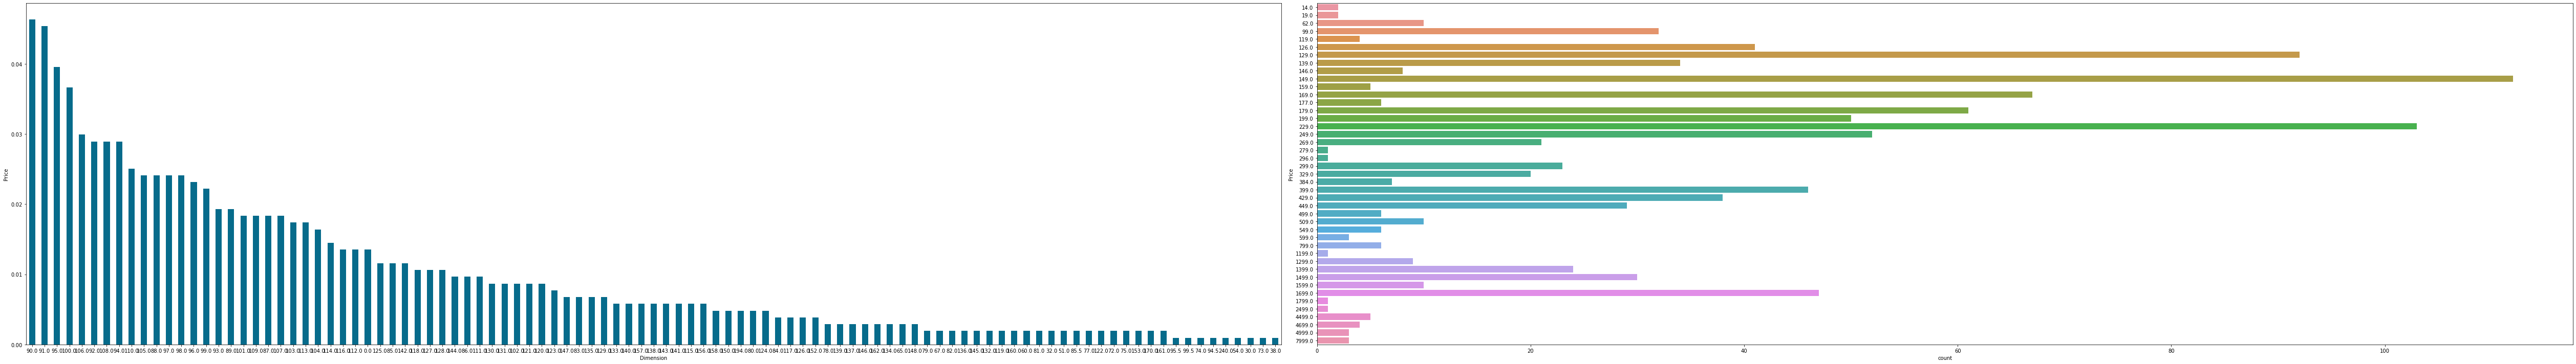

In [50]:
plt.figure(figsize=(70,10))
plt.subplot(1,2,1)
bd['Dimensions'].value_counts(normalize=True).plot.bar(rot=0, color='#066b8b')
plt.ylabel('Price')
plt.xlabel('Dimension')
plt.subplot(1,2,2)
sns.countplot(data=bd,y='Price')
plt.tight_layout()
plt.show() 

In [52]:
bd['Price'].unique()

array([ 179.,  269., 1299.,  149.,  139.,  399., 4499., 7999., 2499.,
        549.,  499.,  199.,  384.,  299.,  249.,  329.,  229.,  159.,
        129.,  169., 1699.,   14.,  126.,  296.,  146.,  509.,   99.,
        279., 1599., 4699., 4999., 1799., 1199.,  449., 1499.,  799.,
        177.,  119.,  429., 1399.,   19.,  599.,   62.])

In [54]:
bd['Dimensions'].unique()

array([ 95. , 158. ,   0. , 128. , 119. ,  93. , 160. , 110. , 111. ,
       107. , 103. , 106. , 105. ,  91. ,  90. , 101. , 109. ,  97. ,
        94. ,  98. , 150. , 156. , 144. , 142. , 127. , 146. , 152. ,
       120. , 121. , 118. , 148. ,  87. , 113. , 112. , 117. , 114. ,
       104. ,  85. ,  86. ,  96. ,  99. ,  92. ,  89. ,  88. ,  83. ,
        94.5, 130. , 108. ,  67. ,  81. , 115. , 162. , 134. , 147. ,
       131. , 141. , 129. , 143. , 135. ,  85.5, 100. , 153. , 125. ,
        80. , 102. ,  77. ,  75. ,  72. ,  65. ,  74. ,  79. ,  78. ,
       123. , 122. , 240. , 126. , 124. ,  84. , 133. , 140. , 137. ,
       170. , 161. , 194. , 116. ,  38. ,  30. ,  32. , 139. ,  60. ,
        95.5,  99.5, 157. , 138. , 132. , 145. , 136. ,  54. ,  82. ,
        73. ,  51. ])

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.kdeplot(df_features['alcohol'],shade=True,color='#d1aa00')
plt.ylabel('alcohol')
plt.xlabel('% distribution per category')
plt.subplot(1,2,2)
df_features['alcohol'].plot.box()
plt.tight_layout()
plt.show()